In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_excel('./DB1.xlsx')
dataOrig=pd.read_excel('./DB1.xlsx')

In [3]:
data.head()

,Gender,Hemoglobin (mul),Hemoglobin,MCH,MCHC,MCV,HCT,RBC,Mhgb,Mhct,...,Macrocyt,Normal,Fer,B12,Mahz,Mzhda,Mb12,Mmahz,Mmzhda,Mmb12
0,1,149,14.9,22.7,27.120669,83.7,0.549396,6.563877,0.0,0.0,...,0,0,42,403,0.10,0.0,0.000000,0,0,0
1,0,159,15.9,25.4,35.277778,72.0,0.450709,6.259843,0.0,0.0,...,0,0,62,390,1.00,0.0,0.033333,0,0,0
2,0,90,9.0,21.5,30.196629,71.2,0.298047,4.186047,1.0,1.0,...,0,1,17,268,0.00,1.0,0.440000,0,1,0
3,0,149,14.9,16.0,18.285714,87.5,0.814844,9.312500,0.0,0.0,...,0,0,55,216,0.75,0.0,0.613333,0,0,0
4,1,147,14.7,22.0,22.110553,99.5,0.664841,6.681818,0.0,0.0,...,0,0,56,456,0.80,0.0,0.000000,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            1421 non-null   int64  
 1   Hemoglobin (mul)  1421 non-null   int64  
 2   Hemoglobin        1421 non-null   float64
 3   MCH               1421 non-null   float64
 4   MCHC              1421 non-null   float64
 5   MCV               1421 non-null   float64
 6   HCT               1421 non-null   float64
 7   RBC               1421 non-null   float64
 8   Mhgb              1421 non-null   float64
 9   Mhct              1421 non-null   float64
 10  Mmchc             1421 non-null   float64
 11  Mmch              1421 non-null   float64
 12  Mmcv              1421 non-null   float64
 13  Mrbc              1421 non-null   float64
 14  siM               1421 non-null   float64
 15  Res               1421 non-null   int64  
 16  Result            1421 non-null   int64  


In [5]:
data

,Gender,Hemoglobin (mul),Hemoglobin,MCH,MCHC,MCV,HCT,RBC,Mhgb,Mhct,...,Macrocyt,Normal,Fer,B12,Mahz,Mzhda,Mb12,Mmahz,Mmzhda,Mmb12
0,1,149,14.9,22.7,27.120669,83.7,0.549396,6.563877,0.0,0.000000,...,0,0,42,403,0.10,0.00,0.000000,0,0,0
1,0,159,15.9,25.4,35.277778,72.0,0.450709,6.259843,0.0,0.000000,...,0,0,62,390,1.00,0.00,0.033333,0,0,0
2,0,90,9.0,21.5,30.196629,71.2,0.298047,4.186047,1.0,1.000000,...,0,1,17,268,0.00,1.00,0.440000,0,1,0
3,0,149,14.9,16.0,18.285714,87.5,0.814844,9.312500,0.0,0.000000,...,0,0,55,216,0.75,0.00,0.613333,0,0,0
4,1,147,14.7,22.0,22.110553,99.5,0.664841,6.681818,0.0,0.000000,...,0,0,56,456,0.80,0.00,0.000000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,0,106,10.6,25.4,30.639324,82.9,0.345961,4.173228,1.0,0.425492,...,0,0,30,402,0.00,0.50,0.000000,0,0,0
1417,1,121,12.1,28.3,32.566168,86.9,0.371551,4.275618,0.4,0.105610,...,0,0,31,95,0.00,0.45,1.000000,0,0,0
1418,1,131,13.1,17.7,21.933086,80.7,0.597271,7.401130,0.0,0.000000,...,0,0,69,478,1.00,0.00,0.000000,0,0,0
1419,0,143,14.3,16.2,17.016807,95.2,0.840346,8.827160,0.0,0.000000,...,0,1,65,253,1.00,0.00,0.490000,1,0,0


In [6]:
to_drop = [1,8,9,10,11,12,13,14,15]+list(range(17,24))+list(range(29,32))
data.drop(data.columns[to_drop], axis=1,inplace=True)

In [7]:
data

,Gender,Hemoglobin,MCH,MCHC,MCV,HCT,RBC,Result,Microcyt,Macrocyt,Normal,Fer,B12,Mmahz,Mmzhda,Mmb12
0,1,14.9,22.7,27.120669,83.7,0.549396,6.563877,0,1,0,0,42,403,0,0,0
1,0,15.9,25.4,35.277778,72.0,0.450709,6.259843,0,1,0,0,62,390,0,0,0
2,0,9.0,21.5,30.196629,71.2,0.298047,4.186047,1,1,0,1,17,268,0,1,0
3,0,14.9,16.0,18.285714,87.5,0.814844,9.312500,0,1,0,0,55,216,0,0,0
4,1,14.7,22.0,22.110553,99.5,0.664841,6.681818,0,1,0,0,56,456,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,0,10.6,25.4,30.639324,82.9,0.345961,4.173228,1,0,0,0,30,402,0,0,0
1417,1,12.1,28.3,32.566168,86.9,0.371551,4.275618,1,0,0,0,31,95,0,0,0
1418,1,13.1,17.7,21.933086,80.7,0.597271,7.401130,1,1,0,0,69,478,0,0,0
1419,0,14.3,16.2,17.016807,95.2,0.840346,8.827160,0,1,0,1,65,253,1,0,0


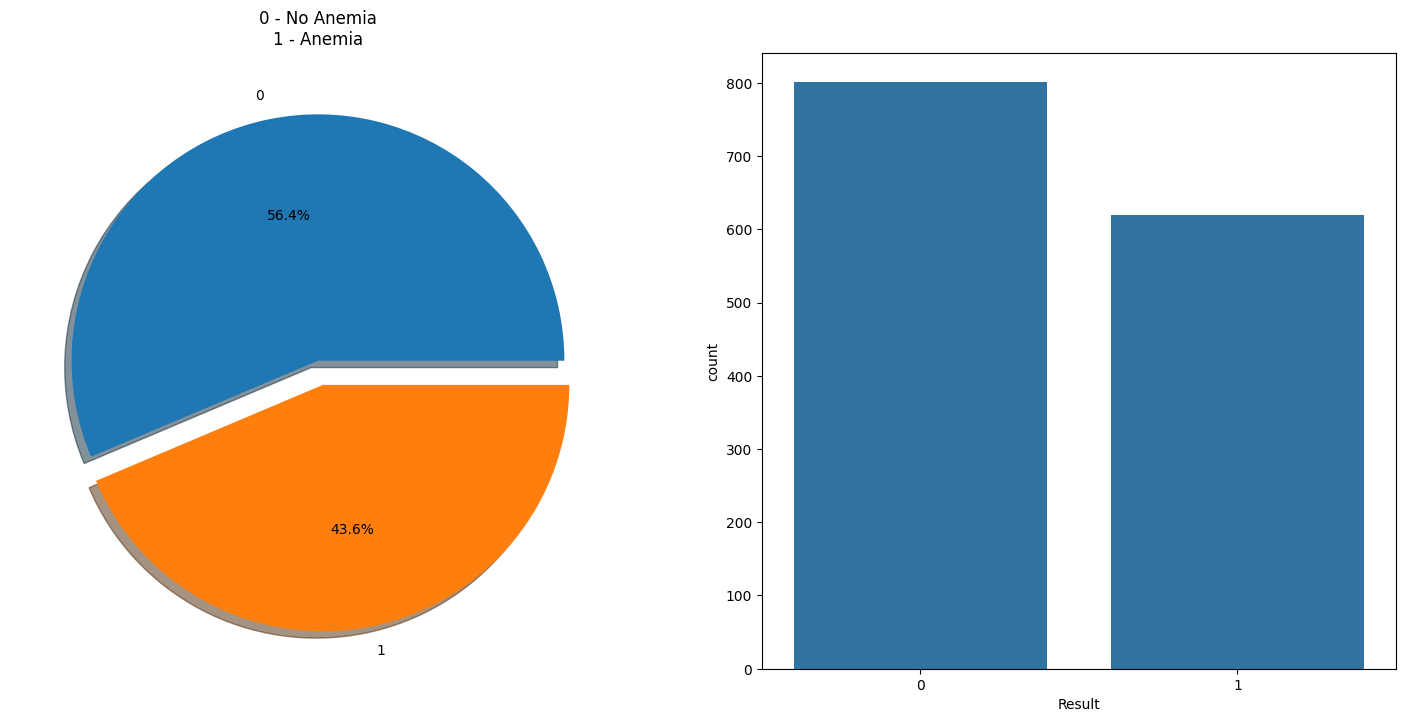

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Result'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('0 - No Anemia\n1 - Anemia')
ax[0].set_ylabel('')
sns.countplot(data=data, x='Result',ax=ax[1])
# ax[1].set_title('had anemia')
plt.show()

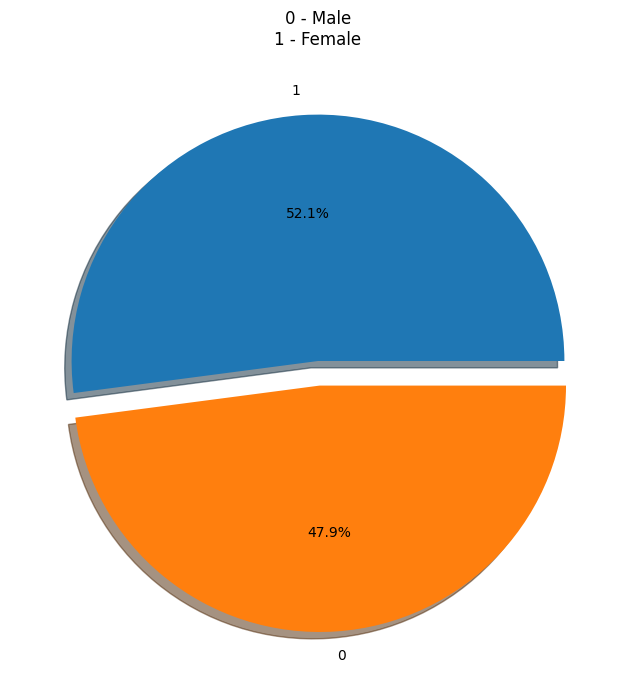

In [9]:
f,ax=plt.subplots(1,1,figsize=(18,8))
data['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax,shadow=True)
ax.set_title('0 - Male\n1 - Female')
ax.set_ylabel('')
plt.show()

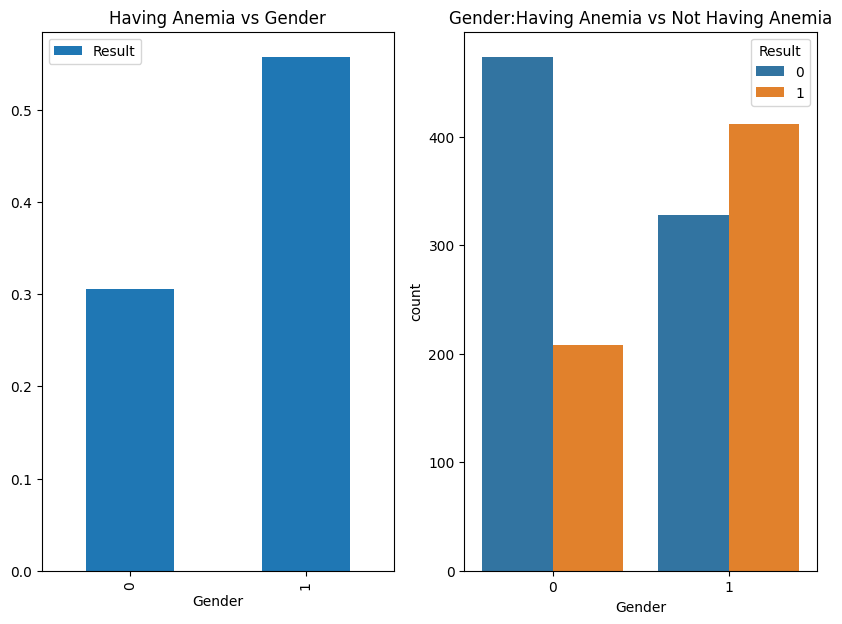

In [10]:
f,ax=plt.subplots(1,2,figsize=(10,7))
data[['Gender','Result']].groupby(['Gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Having Anemia vs Gender')
sns.countplot(x='Gender',hue='Result',data=data,ax=ax[1])
ax[1].set_title('Gender:Having Anemia vs Not Having Anemia')
plt.show()

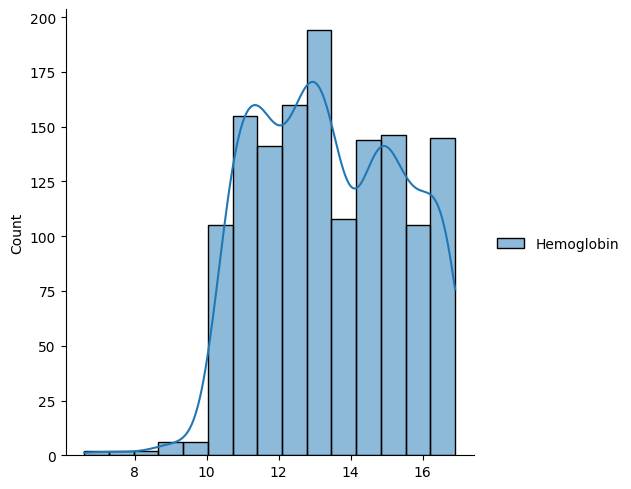

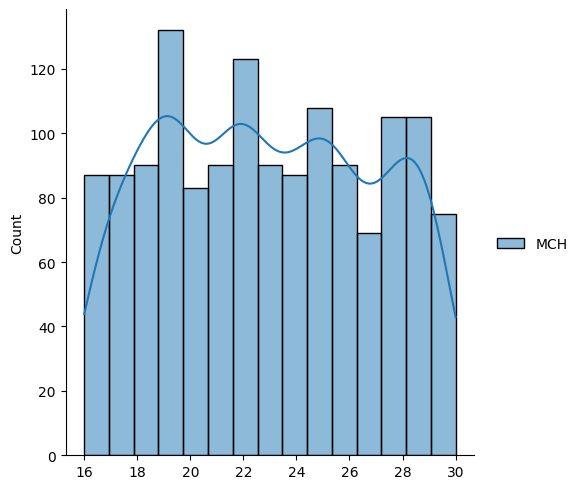

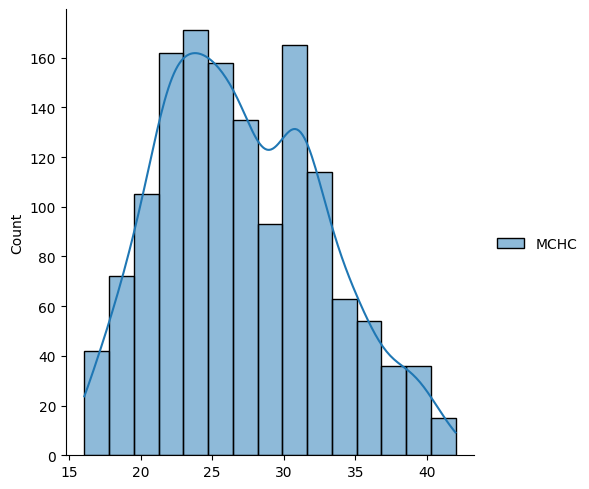

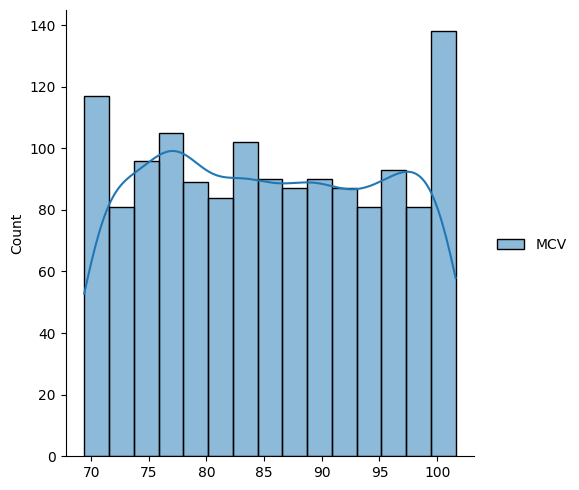

In [11]:
for i in range(1,5):
  sns.displot(data.iloc[:,i:i+1], kde=True, bins=15)

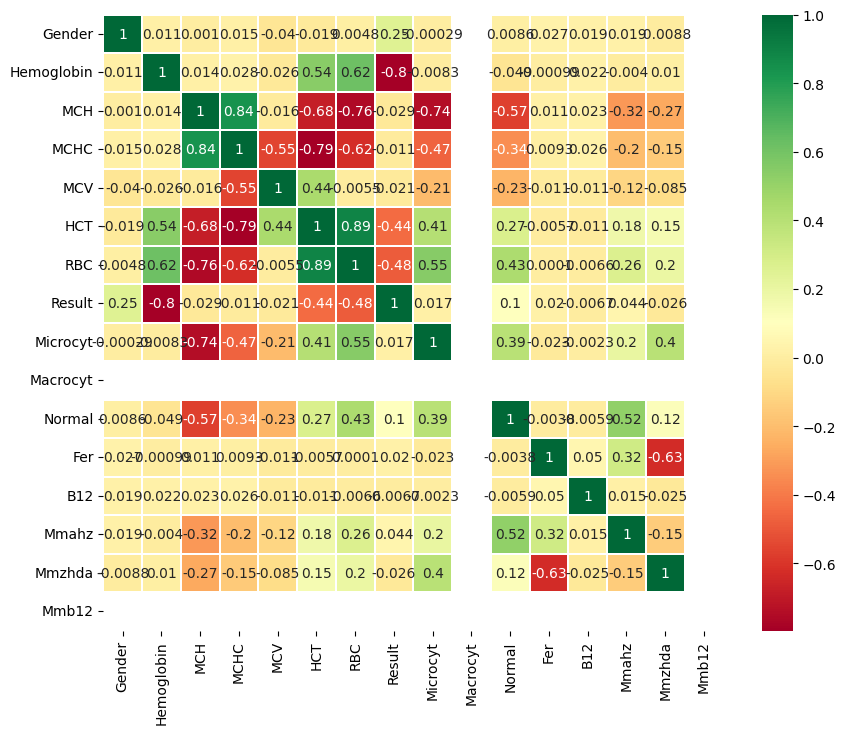

In [12]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
Y_arr = ['Result', 'Microcyt', 'Macrocyt','Normal', 'Mmahz','Mmzhda','Mmb12']
X = np.array(data.drop(Y_arr, axis=1).astype(float))
Y = np.array(data.loc[:,Y_arr]).astype(float)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [16]:
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(max_iter=3000),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
cv_mean=np.zeros((len(models),7))
accuracy=np.zeros((len(models),7))
std=np.zeros((len(models),7))
kfold = KFold(n_splits=10)
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
for m in range(len(models)):
  for i in [0,1,3,4,5]:
    Y_cur = Y[:,i]
    model = models[m]
    model.fit(X,Y_cur)
    cv_result = cross_val_score(model,X,Y_cur, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    cv_mean[m,i]=(cv_result.mean())
    std[m,i]=(cv_result.std())

In [17]:
df_models=pd.DataFrame(cv_mean,index=classifiers, columns=['Result', 'Microcyt', 'Macrocyt','Normal', 'Mmahz','Mmzhda','Mmb12'])
df_models

,Result,Microcyt,Macrocyt,Normal,Mmahz,Mmzhda,Mmb12
Linear Svm,0.996479,0.988737,0.0,0.921900,0.953536,0.944406,0.0
Radial Svm,0.563641,0.647419,0.0,0.780434,0.928918,0.829686,0.0
Logistic Regression,0.990855,0.989437,0.0,0.917665,0.952132,0.938777,0.0
KNN,0.554550,0.813538,0.0,0.820565,0.933133,0.912730,0.0
Decision Tree,1.000000,1.000000,0.0,0.996484,0.992963,0.998592,0.0
Naive Bayes,0.902871,0.862765,0.0,0.807220,0.931050,0.933842,0.0
Random Forest,1.000000,0.999296,0.0,0.998592,0.988033,0.997183,0.0


In [18]:
np.mean(df_models.drop(['Macrocyt','Mmb12'], axis=1), axis=1)

Linear Svm             0.961012
Radial Svm             0.750020
Logistic Regression    0.957773
KNN                    0.806903
Decision Tree          0.997608
Naive Bayes            0.887549
Random Forest          0.996621
dtype: float64

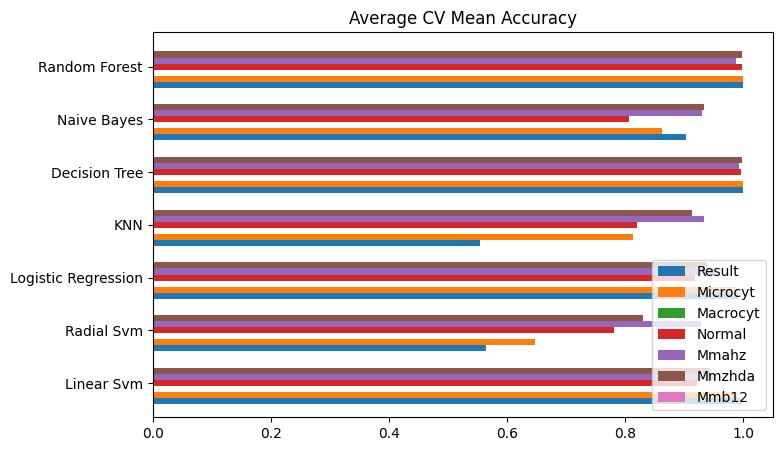

In [19]:
df_models.plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

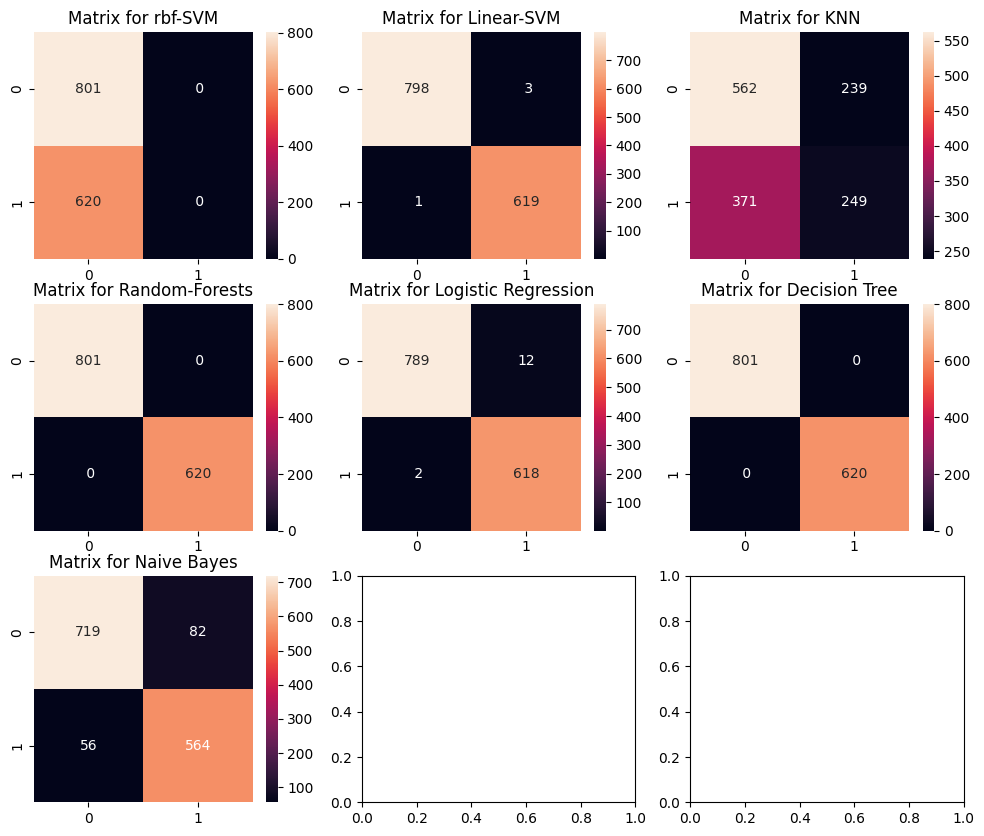

In [20]:
f,ax=plt.subplots(3,3,figsize=(12,10))
Y_cur = Y[:,0]
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y_cur,cv=10)
sns.heatmap(confusion_matrix(Y_cur,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y_cur,cv=10)
sns.heatmap(confusion_matrix(Y_cur,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=5),X,Y_cur,cv=10)
sns.heatmap(confusion_matrix(Y_cur,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y_cur,cv=10)
sns.heatmap(confusion_matrix(Y_cur,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(max_iter=3000),X,Y_cur,cv=10)
sns.heatmap(confusion_matrix(Y_cur,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y_cur,cv=10)
sns.heatmap(confusion_matrix(Y_cur,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y_cur,cv=10)
sns.heatmap(confusion_matrix(Y_cur,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

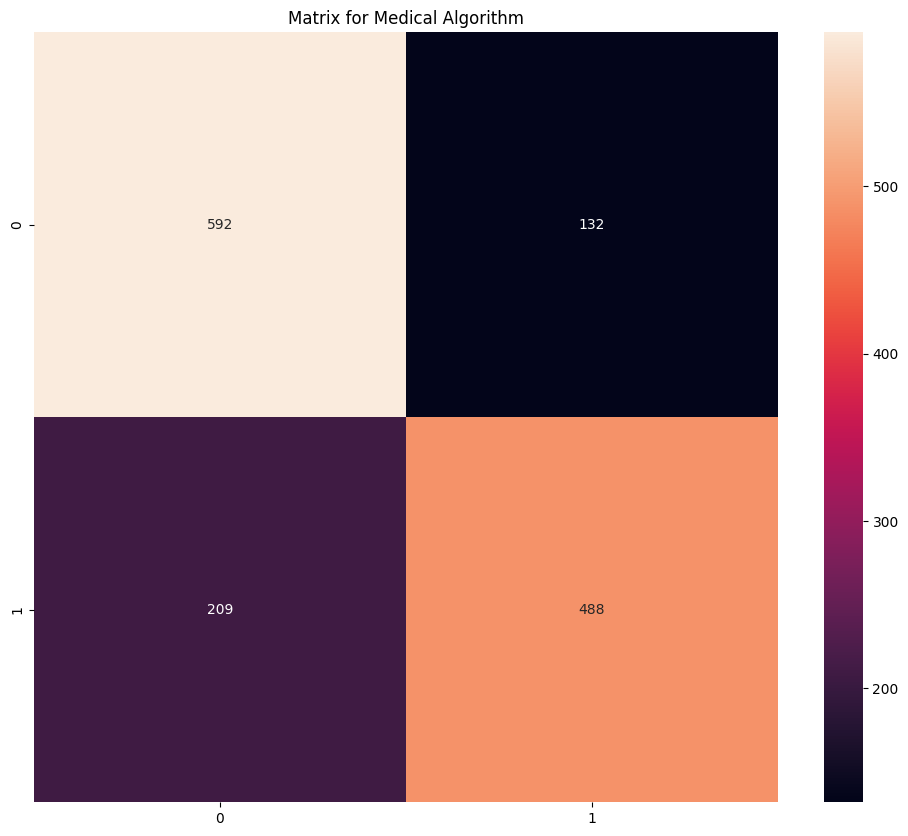

In [21]:
f,ax=plt.subplots(1,1,figsize=(12,10))
sns.heatmap(confusion_matrix(dataOrig['Res'],dataOrig['Result']),ax=ax,annot=True,fmt='2.0f')
ax.set_title('Matrix for Medical Algorithm')
plt.show()

In [22]:
1-abs(np.sum(np.abs(dataOrig['Res'] - dataOrig['Result']))/len(dataOrig))

0.7600281491907108